ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

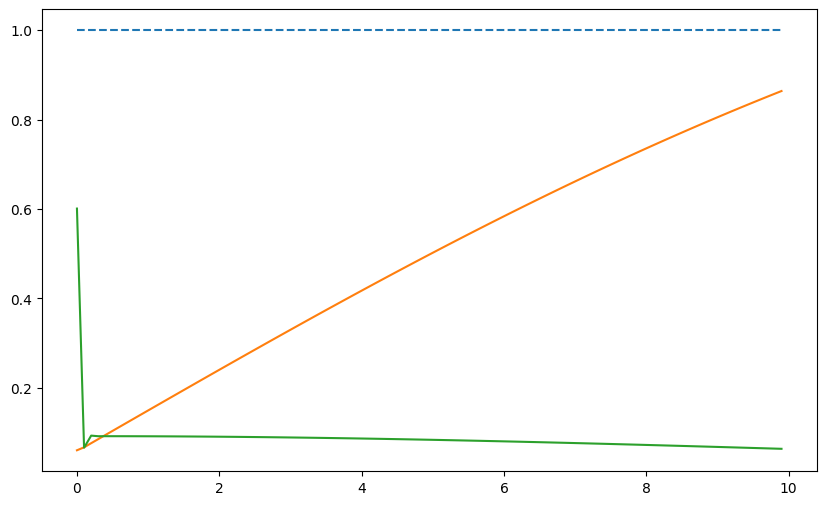

In [4]:
import matplotlib.pyplot as plt

class PIDController:
    def __init__(self, kp, ki, kd):
        self.kp = kp
        self.ki = ki
        self.kd = kd
        self.prev_error = 0
        self.integral = 0

    def calculate(self, error, dt):
        self.integral += error * dt
        derivative = (error - self.prev_error) / dt
        output = self.kp * error + self.ki * self.integral + self.kd * derivative
        self.prev_error = error
        return output

# Simulation parameters
target_value = 1
initial_value = 0
kp, ki, kd = 0.1, 0.01, 0.05
simulation_time = 10  # in seconds
dt = 0.1  # time step

# Initialize PID controller
pid = PIDController(kp, ki, kd)

# Simulation
time_values = []
target_values = []
actual_values = []
pid_outputs = []
current_values = []

current_value = initial_value
for time in range(int(simulation_time / dt)):
    error = target_value - current_value
    pid_output = pid.calculate(error, dt)

    # Update current value (simulate a process)
    current_value += pid_output * dt

    # Store values for plotting
    time_values.append(time * dt)
    target_values.append(target_value)
    actual_values.append(current_value)
    pid_outputs.append(pid_output)
    current_values.append(current_value)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time_values, target_values, label="Target Value", linestyle="--")
plt.plot(time_values, actual_values, label="Actual Value")
plt.plot(time_values, pid_outputs, label="PID Output")
plt.plot(time_values, current_values, label="Current Value")
plt.xlabel("Time (seconds)")
plt.ylabel("Value")
plt.title("PID Controller Simulation")
plt.legend()
plt.grid(True)
plt.show()
